# Strength of Friendship Paradox - Twitter Script
This notebook processes Twitter @mention networks from Park et al. (2018). 

In [1]:
# import libraries
import pandas as pd
import numpy as np
from collections import Counter
from math import log10
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read data
d_name = 'SG_edgelist.bz2'
df = pd.read_csv('data/'+d_name, compression="bz2", sep="\t")

In [3]:
df

node1   node2  range  f12  f21  geodist
0         82949  160291    2.0   17   10      4.2
1        175650  160291    2.0    7    5      NaN
2        332107  160291    2.0    4    7      6.4
3        306385  160291    3.0  111    7      NaN
4         47298  160291    3.0    1    1      NaN
...         ...     ...    ...  ...  ...      ...
3031001  378977  254946    2.0    4    4      NaN
3031002    2181  326316    2.0  140  203      NaN
3031003  154752  395150    5.0    1   30      NaN
3031004  125116   86190    2.0    5    3      NaN
3031005  211831  316550    2.0   78   67      NaN

[3031006 rows x 6 columns]

In [24]:
# create an average weigth variable
df['w'] = (df['f12']+df['f21'])/2
# create a min weight varaible
# df['w'] = df[['f12','f21']].min(axis=1)

# create an absolute weight difference variable
# df['d'] = abs(df['f12']-df['f21'])

(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
        1.e+06, 1.e+07, 1.e+08]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

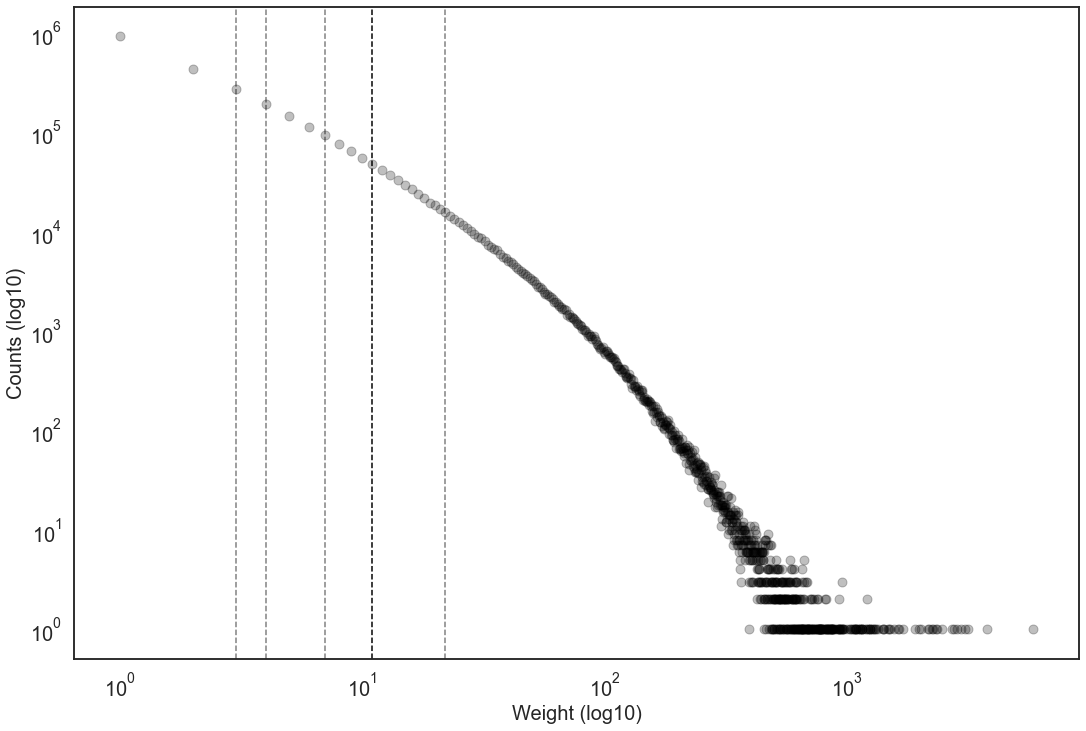

In [5]:
# creae the weight distribution
dist_df = pd.DataFrame(list(Counter(df.w).items()))
# dist_df = dist_df.applymap(log10)
dist_df.columns = ["weight", "counts"]

# plot
sns.set(style="white", context="talk",rc={'figure.figsize':(18,12)})
# sns.lmplot(x="weight", y="counts", data=dist_df, scatter=True)
               #markers='.', scatter_kws={"s": 10})
sns.regplot(x="weight", y="counts", data=dist_df,fit_reg=False, 
            color = '#000000', scatter_kws={'alpha':0.25})
plt.axvline(x=df['w'].quantile(.5),
            alpha =.5,
            color= '#000000',
            ls='--', 
            lw=1.5)
plt.axvline(x=df['w'].quantile(.6),
            alpha =.5,
            color= '#000000',
            ls='--', 
            lw=1.5)
plt.axvline(x=df['w'].quantile(.7),
            alpha =.5,
            color= '#000000',
            ls='--', 
            lw=1.5)
plt.axvline(x=df['w'].quantile(.8),
            color= '#000000',
            ls='--', 
            lw=1.5)
plt.axvline(x=df['w'].quantile(.9),
            alpha =.5,
            color= '#000000',
            ls='--', 
            lw=1.5)
# g.figure.set_size_inches(12,12)
# g.set(xscale="log", yscale="log")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Weight (log10)', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Counts (log10)', fontsize = 20) # y-axis label with fontsize 15
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
# # g.set_axis_labels("weight (log10)", "counts (log10)")

(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
        1.e+06, 1.e+07, 1.e+08]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

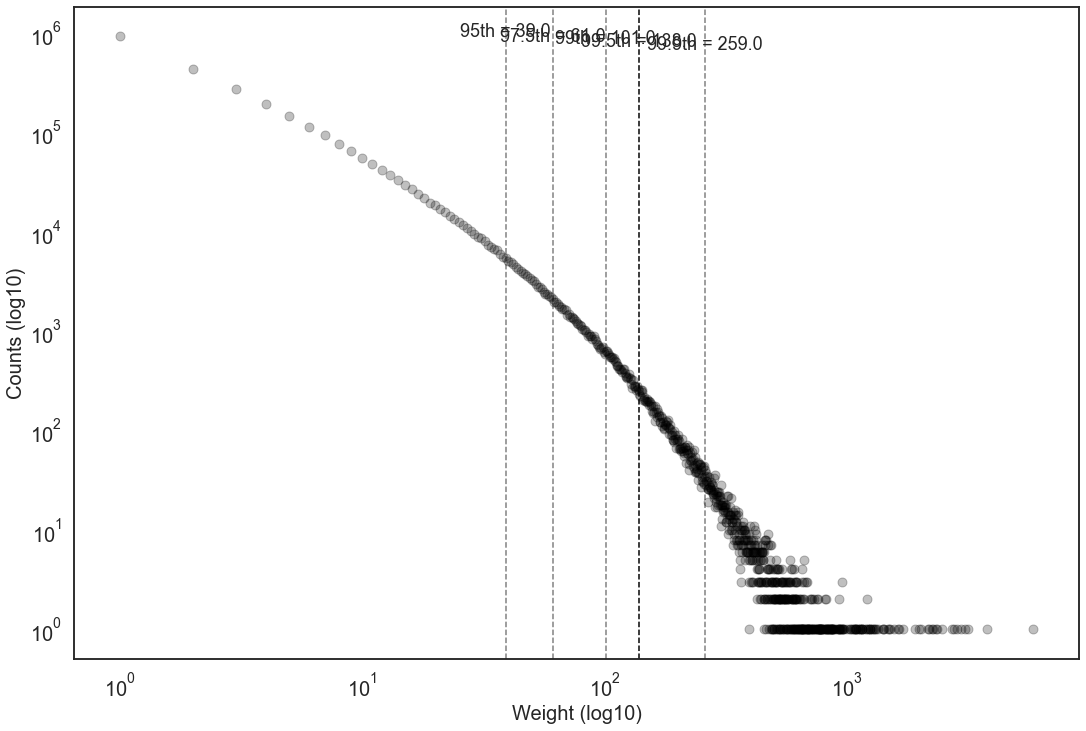

In [6]:
# plot
sns.set(style="white", context="talk",rc={'figure.figsize':(18,12)})
# sns.lmplot(x="weight", y="counts", data=dist_df, scatter=True)
               #markers='.', scatter_kws={"s": 10})
sns.regplot(x="weight", y="counts", data=dist_df,fit_reg=False, 
            color = '#000000', scatter_kws={'alpha':0.25})
plt.axvline(x=df['w'].quantile(.95),
            alpha =.5,
            color= '#000000',
            ls='--', 
            lw=1.5)
plt.text(df['w'].quantile(.95),dist_df['counts'].max(), '95th = {:.1f}'.format(df['w'].quantile(.95)),fontsize=18,ha='center')
plt.axvline(x=df['w'].quantile(.975),
            alpha =.5,
            color= '#000000',
            ls='--', 
            lw=1.5)
plt.text(df['w'].quantile(.975),dist_df['counts'].max()-100000, '97.5th = {:.1f}'.format(df['w'].quantile(.975)),fontsize=18,ha='center')
plt.axvline(x=df['w'].quantile(.99),
            alpha =.5,
            color= '#000000',
            ls='--', 
            lw=1.5)
plt.text(df['w'].quantile(.99),dist_df['counts'].max()-150000, '99th = {:.1f}'.format(df['w'].quantile(.99)),fontsize=18,ha='center')
plt.axvline(x=df['w'].quantile(.995),
            color= '#000000',
            ls='--', 
            lw=1.5)
plt.text(df['w'].quantile(.995),dist_df['counts'].max()-200000, '99.5th = {:.1f}'.format(df['w'].quantile(.995)),fontsize=18,ha='center')
plt.axvline(x=df['w'].quantile(.999),
            alpha =.5,
            color= '#000000',
            ls='--', 
            lw=1.5)
plt.text(df['w'].quantile(.999),dist_df['counts'].max()-250000, '99.9th = {:.1f}'.format(df['w'].quantile(.999)),fontsize=18,ha='center')
# g.figure.set_size_inches(12,12)
# g.set(xscale="log", yscale="log")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Weight (log10)', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Counts (log10)', fontsize = 20) # y-axis label with fontsize 15
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

## FP Calculation for Different Cutoffs

(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
        1.e+06, 1.e+07]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

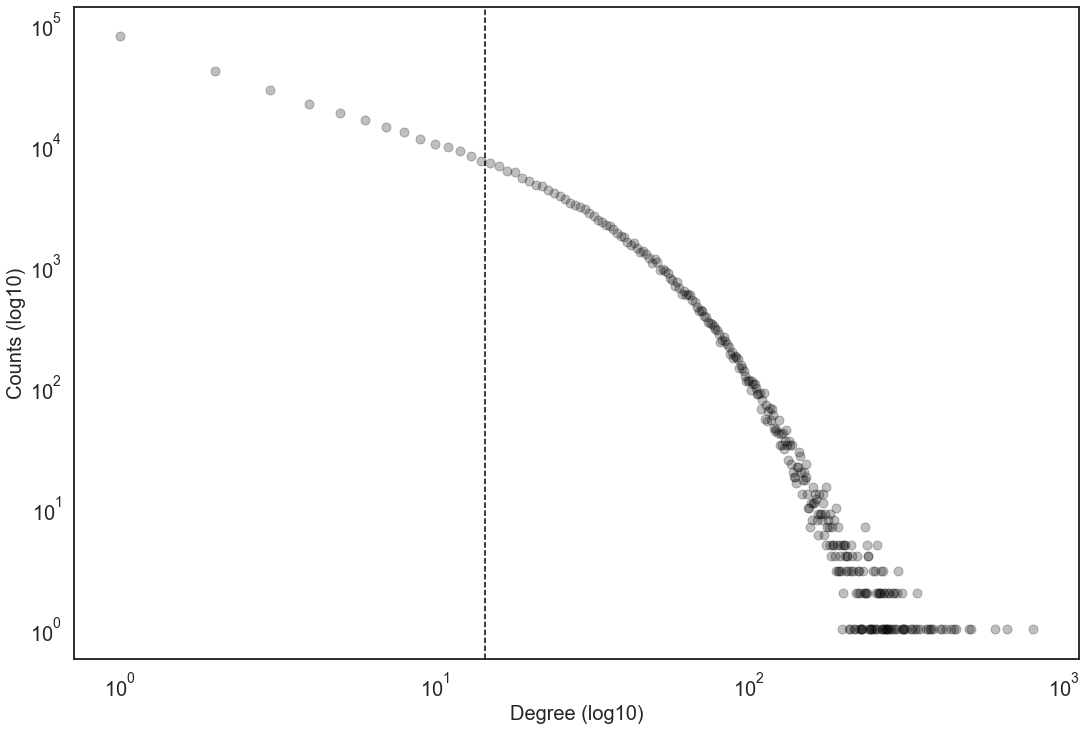

In [7]:
# degree distribution
A_degree = pd.DataFrame(list(Counter(df.loc[:,'node1'].append(df.loc[:,'node2'])).items()))
A_degree.columns = ["node", "degree"]
A_df = pd.DataFrame(list(Counter(A_degree.degree).items()))
A_df.columns = ["degree", "counts"]

# plot
sns.set(style="white", context="talk",rc={'figure.figsize':(18,12)})
# sns.lmplot(x="weight", y="counts", data=dist_df, scatter=True)
               #markers='.', scatter_kws={"s": 10})
sns.regplot(x="degree", y="counts", data=A_df,fit_reg=False, 
            color = '#000000', scatter_kws={'alpha':0.25})
plt.axvline(x=A_degree['degree'].mean(),
            color= '#000000',
            ls='--', 
            lw=1.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree (log10)', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Counts (log10)', fontsize = 20) # y-axis label with fontsize 15
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
        1.e+06, 1.e+07]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

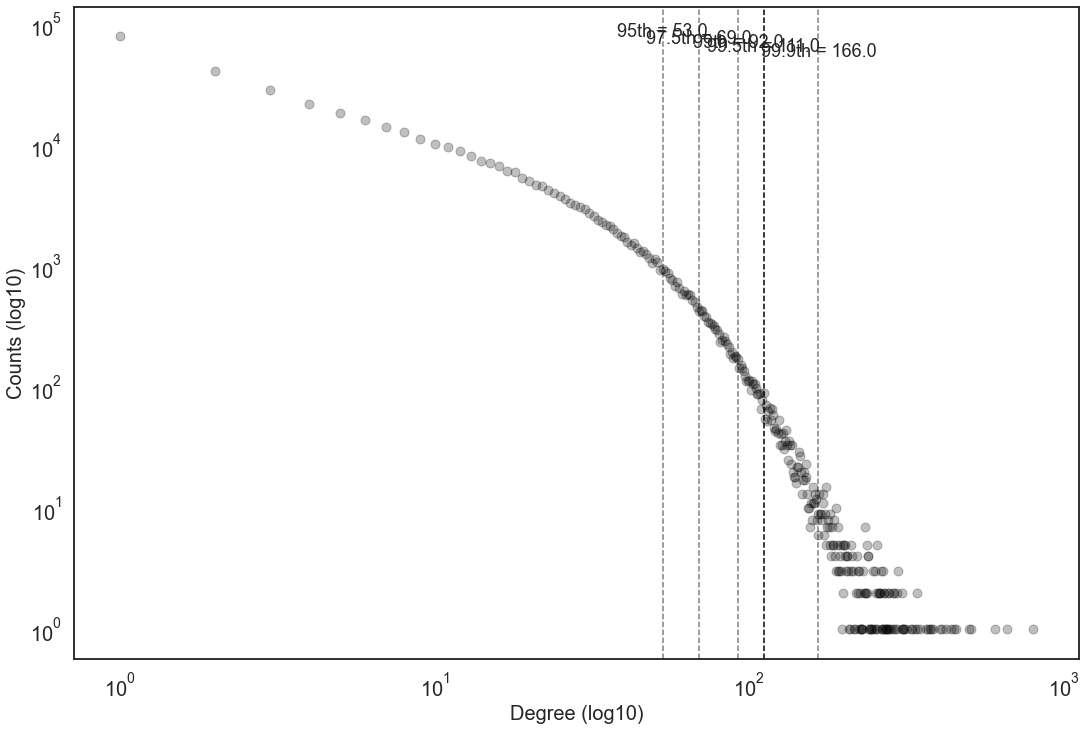

In [11]:
# plot
sns.set(style="white", context="talk",rc={'figure.figsize':(18,12)})
# sns.lmplot(x="weight", y="counts", data=dist_df, scatter=True)
               #markers='.', scatter_kws={"s": 10})
sns.regplot(x="degree", y="counts", data=A_df,fit_reg=False, 
            color = '#000000', scatter_kws={'alpha':0.25})
plt.axvline(x=A_degree['degree'].quantile(.95),
            alpha =.5,
            color= '#000000',
            ls='--', 
            lw=1.5)
plt.text(A_degree['degree'].quantile(.95),A_df['counts'].max(), '95th = {:.1f}'.format(A_degree['degree'].quantile(.95)),fontsize=18,ha='center')
plt.axvline(x=A_degree['degree'].quantile(.975),
            alpha =.5,
            color= '#000000',
            ls='--', 
            lw=1.5)
plt.text(A_degree['degree'].quantile(.975),A_df['counts'].max()-10000, '97.5th = {:.1f}'.format(A_degree['degree'].quantile(.975)),fontsize=18,ha='center')
plt.axvline(x=A_degree['degree'].quantile(.99),
            alpha =.5,
            color= '#000000',
            ls='--', 
            lw=1.5)
plt.text(A_degree['degree'].quantile(.99),A_df['counts'].max()-15000, '99th = {:.1f}'.format(A_degree['degree'].quantile(.99)),fontsize=18,ha='center')
plt.axvline(x=A_degree['degree'].quantile(.995),
            color= '#000000',
            ls='--', 
            lw=1.5)
plt.text(A_degree['degree'].quantile(.995),A_df['counts'].max()-20000, '99.5th = {:.1f}'.format(A_degree['degree'].quantile(.995)),fontsize=18,ha='center')
plt.axvline(x=A_degree['degree'].quantile(.999),
            alpha =.5,
            color= '#000000',
            ls='--', 
            lw=1.5)
plt.text(A_degree['degree'].quantile(.999),A_df['counts'].max()-25000, '99.9th = {:.1f}'.format(A_degree['degree'].quantile(.999)),fontsize=18,ha='center')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree (log10)', fontsize = 20) 
plt.ylabel('Counts (log10)', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

In [31]:
# number of unique users
len(A_degree.index)

419750

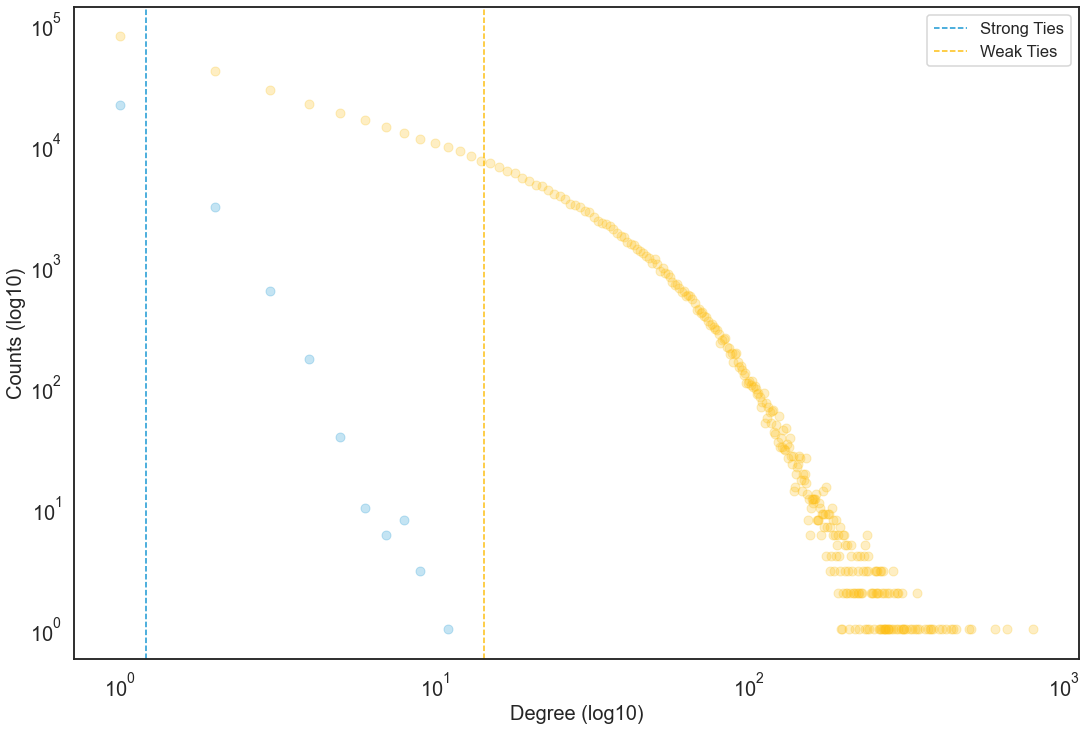

In [12]:
# set up a cutoff by quantile
cutoff = df['w'].quantile(.995)
# separate Strong vs. Weak
S_df = df.loc[df.w >= cutoff,:]
W_df = df.loc[df.w < cutoff,:]

# degree calculaion
S_degree = pd.DataFrame(list(Counter(S_df.loc[:,'node1'].append(S_df.loc[:,'node2'])).items()))
S_degree.columns = ["node", "degree"]
S_df = pd.DataFrame(list(Counter(S_degree.degree).items()))
S_df.columns = ["degree", "counts"]
W_degree = pd.DataFrame(list(Counter(W_df.loc[:,'node1'].append(W_df.loc[:,'node2'])).items()))
W_degree.columns = ["node", "degree"]
W_df = pd.DataFrame(list(Counter(W_degree.degree).items()))
W_df.columns = ["degree", "counts"]

# plot
sns.set(style="white", context="talk",rc={'figure.figsize':(18,12)})
sns.regplot(x="degree", y="counts", data=S_df,fit_reg=False, 
            color = '#1696d2', scatter_kws={'alpha':0.25})
plt.axvline(x=S_degree['degree'].mean(),
            color= '#1696d2',
            ls='--', 
            lw=1.5)
sns.regplot(x="degree", y="counts", data=W_df,fit_reg=False, 
            color = '#fdbf11', scatter_kws={'alpha':0.25})
plt.axvline(x=W_degree['degree'].mean(),
            color= '#fdbf11',
            ls='--', 
            lw=1.5)
# g.figure.set_size_inches(12,12)
# g.set(xscale="log", yscale="log")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree (log10)', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Counts (log10)', fontsize = 20) # y-axis label with fontsize 15
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc='upper right', labels=['Strong Ties', 'Weak Ties'])

(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
        1.e+06]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

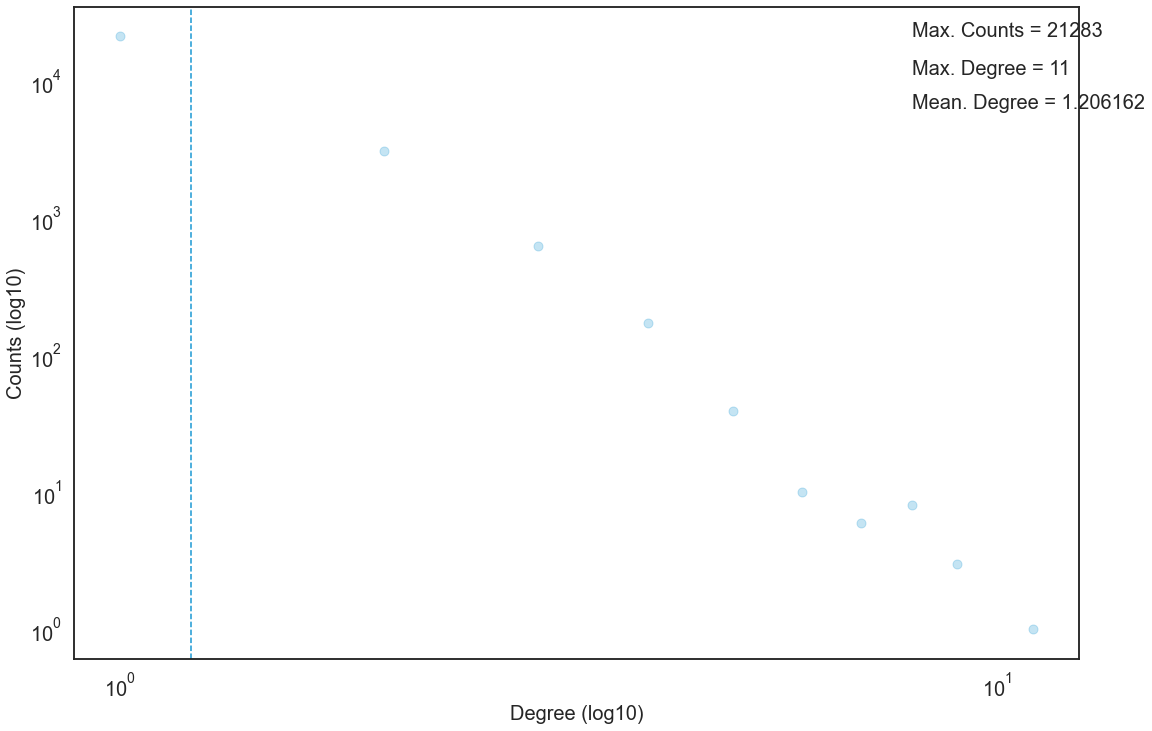

In [13]:
# plot strong tie only
sns.set(style="white", context="talk",rc={'figure.figsize':(18,12)})
sns.regplot(x="degree", y="counts", data=S_df,fit_reg=False, 
            color = '#1696d2', scatter_kws={'alpha':0.25})
plt.axvline(x=S_degree['degree'].mean(),
            color= '#1696d2',
            ls='--', 
            lw=1.5)
plt.text(8,S_df['counts'].max(), 'Max. Counts = {:g}'.format(S_df['counts'].max()),fontsize=20)
plt.text(8,S_df['counts'].max()-10000, 'Max. Degree = {:g}'.format(S_df['degree'].max()),fontsize=20)
plt.text(8,S_df['counts'].max()-15000, 'Mean. Degree = {:2f}'.format(S_degree['degree'].mean()),fontsize=20)
# sns.regplot(x="degree", y="counts", data=W_df,fit_reg=False, 
#             color = '#fdbf11', scatter_kws={'alpha':0.25})
# plt.axvline(x=W_degree['degree'].mean(),
#             color= '#fdbf11',
#             ls='--', 
#             lw=1.5)
# g.figure.set_size_inches(12,12)
# g.set(xscale="log", yscale="log")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree (log10)', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Counts (log10)', fontsize = 20) # y-axis label with fontsize 15
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
# plt.legend(loc='upper right', labels=['Strong Ties', 'Weak Ties'])

In [32]:
# number of unique users in strong ties
len(S_degree.index)

24980

In [31]:
def FP(df):
    '''calculate the strength of FP index'''
    fp = 1 + df['std']/df['mean']**2
    return(fp)

def summary_stat(percent = .5, df = df):
    '''
    calculate summary degree stat
    input: percent e.g., .5, .6, 1
    '''
    cutoff = df['w'].quantile(percent)
    # calculate Mean and SD
    def sum_stat(degree_df):
        sum_df = degree_df.agg({'degree':['mean','std','min','max']})
        sum_df = sum_df.T.reset_index(drop=True)
        return(sum_df)
    # separate cases
    if percent == 1:
        # degree calculation
        A_degree = pd.DataFrame(list(Counter(df.loc[:,'node1'].append(df.loc[:,'node2'])).items()))
        A_degree.columns = ["node", "degree"]
        sum_df = sum_stat(A_degree)
        sum_df['type'] = 'All'
        sum_S['n'] = len(A_degree.index)
        sum_df['n%'] = len(A_degree.index)/len(pd.unique(df.iloc[:,0:2].values.ravel('K')))*100
    else:
        # separate Strong vs. Weak
        S_df = df.loc[df.w >= cutoff,:]
        W_df = df.loc[df.w < cutoff,:]
        # degree calculaion
        S_degree = pd.DataFrame(list(Counter(S_df.loc[:,'node1'].append(S_df.loc[:,'node2'])).items()))
        S_degree.columns = ["node", "degree"]
        W_degree = pd.DataFrame(list(Counter(W_df.loc[:,'node1'].append(W_df.loc[:,'node2'])).items()))
        W_degree.columns = ["node", "degree"]
        sum_S = sum_stat(S_degree)
        sum_S['type'] = 'Strong'
        sum_W = sum_stat(W_degree)
        sum_W['type'] = 'Weak'
        sum_S['n'] = len(S_degree.index)
        sum_W['n'] = len(W_degree.index)
        sum_S['n%'] = len(S_degree.index)/len(pd.unique(df.iloc[:,0:2].values.ravel('K')))*100
        sum_W['n%'] = len(W_degree.index)/len(pd.unique(df.iloc[:,0:2].values.ravel('K')))*100
        sum_df = sum_S.append(sum_W)
    # add extra info
    sum_df['percentile'] = percent
    sum_df['cutoff'] = cutoff
    sum_df['country'] = d_name.split(sep='_')[0]
    return(sum_df)

def degree_cutoff(df, cutoff):
    '''
    this method removes nodes that have greater than a cutoff value
    input: df = edgelist dataframe; cutoff = integer like 150 or percentile
    '''
    # calculate degree of each node
    A_degree = pd.DataFrame(list(Counter(df.loc[:,'node1'].append(df.loc[:,'node2'])).items()))
    A_degree.columns = ["node", "degree"]
    if isinstance(cutoff, int):
        print('the cutoff is ',cutoff)
    else:
        # create a cutoff value by percentile
        cutoff = A_degree['degree'].quantile(cutoff)
        print('the cutoff is ',cutoff)
    # make a cut
    A_list = A_degree.loc[A_degree.degree <= cutoff,]
    # select only rows that are part of A_list['node']
    df = df.loc[(df['node1'].isin(A_list['node'].to_list())) & (df['node2'].isin(A_list['node'].to_list())),]
    return(df)

In [8]:
df['w'].quantile(.99)

153.5

Here, I calculate descriptive statistics by different cutoff.

In [25]:
# stat_df = pd.concat([summary_stat(percent = x) for x in [.5,.6,.7,.8,.9,1]])
stat_df = pd.concat([summary_stat(percent = x) for x in [.999,.995,.99,.975,.95,.90]])

In [30]:
stat_df['FP'] = FP(stat_df)
stat_df.round(2)

mean    std  min    max    type       n     n%  percentile  cutoff  \
0   1.10   0.37  1.0    5.0  Strong    5494   1.31        1.00   366.5   
0  14.43  20.00  1.0  798.0    Weak  419655  99.98        1.00   366.5   
0   1.22   0.60  1.0   15.0  Strong   24980   5.95        1.00   204.0   
0  14.38  19.96  1.0  797.0    Weak  419413  99.92        1.00   204.0   
0   1.34   0.78  1.0   29.0  Strong   45234  10.78        0.99   153.5   
0  14.32  19.89  1.0  794.0    Weak  419230  99.88        0.99   153.5   
0   1.67   1.19  1.0   54.0  Strong   90809  21.63        0.98    98.5   
0  14.12  19.68  1.0  791.0    Weak  418657  99.74        0.98    98.5   
0   2.19   1.78  1.0   71.0  Strong  139432  33.22        0.95    65.0   
0  13.78  19.29  1.0  784.0    Weak  417793  99.53        0.95    65.0   
0   3.17   2.85  1.0  107.0  Strong  192840  45.94        0.90    39.0   
0  13.10  18.47  1.0  771.0    Weak  415978  99.10        0.90    39.0   

  country    FP  
0      SG  1.31  
0      SG  1.10  
0      SG  1.41  
0      SG  1.10  
0      SG  1.44  
0      SG  1.10  
0      SG  1.43  
0      SG  1.10  
0      SG  1.37  
0      SG  1.10  
0      SG  1.28  
0      SG  1.11

In [32]:
stat_df2 = pd.concat([summary_stat(percent = x, df = degree_cutoff(df = df, cutoff= 150)) for x in [.999,.995,.99,.975,.95,.90]]) 
stat_df2['FP'] = FP(stat_df2)
stat_df2.round(2)

the cutoff is  150
the cutoff is  150
the cutoff is  150
the cutoff is  150
the cutoff is  150
the cutoff is  150


mean    std  min    max    type       n     n%  percentile  cutoff  \
0   1.10   0.37  1.0    5.0  Strong    5316   1.27        1.00   369.0   
0  13.95  18.02  1.0  149.0    Weak  418058  99.98        1.00   369.0   
0   1.21   0.58  1.0   11.0  Strong   24172   5.78        1.00   206.0   
0  13.90  17.98  1.0  149.0    Weak  417820  99.92        1.00   206.0   
0   1.33   0.75  1.0   17.0  Strong   44175  10.56        0.99   154.5   
0  13.84  17.92  1.0  149.0    Weak  417634  99.88        0.99   154.5   
0   1.65   1.13  1.0   22.0  Strong   88847  21.25        0.98    99.5   
0  13.65  17.72  1.0  148.0    Weak  417063  99.74        0.98    99.5   
0   2.14   1.67  1.0   29.0  Strong  136719  32.70        0.95    66.0   
0  13.32  17.34  1.0  148.0    Weak  416210  99.54        0.95    66.0   
0   3.10   2.68  1.0   42.0  Strong  190624  45.59        0.90    39.5   
0  12.66  16.55  1.0  148.0    Weak  414417  99.11        0.90    39.5   

  country    FP  
0      SG  1.30  
0      SG  1.09  
0      SG  1.39  
0      SG  1.09  
0      SG  1.42  
0      SG  1.09  
0      SG  1.42  
0      SG  1.10  
0      SG  1.37  
0      SG  1.10  
0      SG  1.28  
0      SG  1.10

In [35]:
stat_df3 = pd.concat([summary_stat(percent = x, df = degree_cutoff(df = df, cutoff= 100)) for x in [.999,.995,.99,.975,.95,.90]]) 
stat_df3['FP'] = FP(stat_df3)
stat_df3.round(2)

the cutoff is  100
the cutoff is  100
the cutoff is  100
the cutoff is  100
the cutoff is  100
the cutoff is  100


mean    std  min   max    type       n     n%  percentile  cutoff country  \
0   1.10   0.36  1.0   5.0  Strong    4876   1.17        1.00   377.0      SG   
0  12.85  15.31  1.0  99.0    Weak  414925  99.98        1.00   377.0      SG   
0   1.20   0.55  1.0   9.0  Strong   22289   5.37        1.00   211.0      SG   
0  12.80  15.27  1.0  99.0    Weak  414688  99.92        1.00   211.0      SG   
0   1.31   0.71  1.0  15.0  Strong   40813   9.83        0.99   158.5      SG   
0  12.74  15.22  1.0  99.0    Weak  414513  99.88        0.99   158.5      SG   
0   1.60   1.06  1.0  20.0  Strong   83758  20.18        0.98   102.0      SG   
0  12.57  15.03  1.0  99.0    Weak  413951  99.74        0.98   102.0      SG   
0   2.05   1.56  1.0  23.0  Strong  131040  31.57        0.95    67.5      SG   
0  12.26  14.69  1.0  99.0    Weak  413108  99.54        0.95    67.5      SG   
0   2.93   2.44  1.0  31.0  Strong  184824  44.53        0.90    40.5      SG   
0  11.66  13.97  1.0  99.0    Weak  411332  99.11        0.90    40.5      SG   

     FP  
0  1.30  
0  1.09  
0  1.38  
0  1.09  
0  1.41  
0  1.09  
0  1.42  
0  1.10  
0  1.37  
0  1.10  
0  1.28  
0  1.10

In [34]:
stat_df4 = pd.concat([summary_stat(percent = x, df = degree_cutoff(df = df, cutoff= 50)) for x in [.999,.995,.99,.975,.95,.90]]) 
stat_df4['FP'] = FP(stat_df4)
stat_df4.round(2)

the cutoff is  50
the cutoff is  50
the cutoff is  50
the cutoff is  50
the cutoff is  50
the cutoff is  50


mean   std  min   max    type       n     n%  percentile  cutoff country  \
0  1.08  0.33  1.0   4.0  Strong    3121   0.80        1.00   418.5      SG   
0  8.65  8.44  1.0  50.0    Weak  390498  99.98        1.00   418.5      SG   
0  1.15  0.46  1.0   7.0  Strong   14678   3.76        1.00   234.0      SG   
0  8.62  8.42  1.0  50.0    Weak  390295  99.93        1.00   234.0      SG   
0  1.23  0.59  1.0   9.0  Strong   27567   7.06        0.99   174.5      SG   
0  8.58  8.38  1.0  50.0    Weak  390115  99.88        0.99   174.5      SG   
0  1.42  0.84  1.0  15.0  Strong   59531  15.24        0.98   111.5      SG   
0  8.46  8.26  1.0  50.0    Weak  389609  99.75        0.98   111.5      SG   
0  1.72  1.16  1.0  17.0  Strong   99225  25.40        0.95    73.5      SG   
0  8.26  8.04  1.0  50.0    Weak  388771  99.54        0.95    73.5      SG   
0  2.27  1.69  1.0  23.0  Strong  150241  38.47        0.90    44.0      SG   
0  7.85  7.61  1.0  50.0    Weak  387051  99.10        0.90    44.0      SG   

     FP  
0  1.28  
0  1.11  
0  1.35  
0  1.11  
0  1.39  
0  1.11  
0  1.41  
0  1.12  
0  1.39  
0  1.12  
0  1.33  
0  1.12

## Calculate FP for Each Country

In [92]:
import os
# create a list of bz2 files
bz2_list = [x for x in os.listdir('./data/') if x.endswith(".bz2")]
print(bz2_list)

# parse data to calculate FP
def country_stat(num_country):
    # read data
    d_name = bz2_list[num_country]
    df = pd.read_csv('data/'+d_name, compression="bz2", sep="\t")
    # calculate basic stat
    stat_df = pd.concat([summary_stat(percent = x) for x in [.5,.6,.7,.8,.9,1]])
    # calculate FP
    stat_df['FP'] = FP(stat_df)
    return(stat_df)

In [93]:
bz2_list

['FR_edgelist.bz2',
 'GB_edgelist.bz2',
 'JP_edgelist.bz2',
 'KR_edgelist.bz2',
 'NL_edgelist.bz2',
 'SG_edgelist.bz2',
 'TR_edgelist.bz2',
 'US_edgelist.bz2']

In [95]:
# create a summary stat table includes all the data
stat_df = pd.concat([country_stat(num_country = x) for x in range(len(bz2_list))])
# save it as a csv table
stat_df.to_csv('summary_twitter.csv', sep ='\t')

MemoryError: Unable to allocate 10.2 GiB for an array with shape (4, 343633442) and data type int64